In [7]:
import pandas as pd

In [14]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])
abc = pd.concat([A,B,C],axis = 1)
abc.columns = ["a","b","c"]
abc.head()

,a,b,c
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


In [15]:
from scipy.stats import shapiro
import scipy.stats as stats

In [16]:
stats.levene(abc.a,abc.b,abc.c)

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [17]:
shapiro(abc.a)

(0.969743549823761, 0.5321813225746155)

In [18]:
shapiro(abc.b)

(0.9789854884147644, 0.7979801297187805)

In [19]:
shapiro(abc.c)

(0.9579201340675354, 0.273820161819458)

In [20]:
#bütün dağılımlar normal ve varyansları homojendir

In [51]:
#Hipotez Testi
from scipy.stats import f_oneway
f_oneway(abc.a,abc.b,abc.c)

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [29]:
pvalue = f_oneway(abc.a,abc.b,abc.c)[1]
print("{:.5f}".format(pvalue))

0.00000


In [26]:
#pvalue 0.05'ten küçük olduğu için hipotez reddedilir
#Yani farklı formatlara göre geçirilen sürelerin ortalamaları arasında belirgin bir fark vardır

In [30]:
abc.describe().T
#ortalamalar karşılaştırılarak da farklılığın hangi lehte olduğu bulunabilir

,count,mean,std,min,25%,50%,75%,max
a,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
b,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
c,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


In [45]:
import seaborn as sns
import numpy as np
a = pd.DataFrame(np.arange(len(A)))
a[:] = "a" 
a = pd.concat([A,a],axis = 1)
b = pd.DataFrame(np.arange(len(B)))
b[:] = "b" 
b = pd.concat([B,b],axis = 1)
c = pd.DataFrame(np.arange(len(C)))
c[:] = "c" 
c = pd.concat([C,c],axis = 1)
abc_ = pd.concat([a,b,c])
abc_.columns = ["SÜRE","GRUP"]
abc_.head()

,SÜRE,GRUP
0,28,a
1,33,a
2,30,a
3,29,a
4,28,a


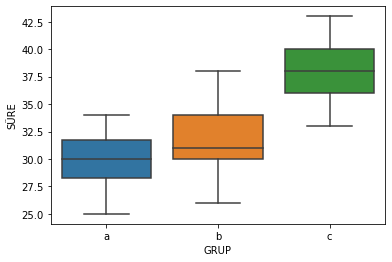

In [47]:
sns.boxplot(x = "GRUP", y = "SÜRE",data = abc_);

Nonparametrik Hipotez Testi

In [50]:
#varsayımlar sağlanmazsa
from scipy.stats import kruskal
print("{:.5f}".format(kruskal(abc.a,abc.b,abc.c)[1]))

0.00000


In [53]:
kruskal(abc.a,abc.b,abc.c)

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)